## Danmarks Statistik
* Python eco-system: python interface for the API to Danmarks Statistik [API](https://www.dst.dk/da/Statistik/statistikbanken/api)

1 Clone or download:
  * Clone or download PyDST from https://github.com/Kristianuruplarsen/PyDST
  * In the repro root run \>\> pip install -e .
  
2 pip:
  * \>\> pip install pydst
  
We will cover a basic example

In [1]:
import PyDST
conn = PyDST.connection(language='en')
table = conn.get_tables('10088')

Getting all tables under topic code(s) {topics}


### Getting table info/content

In [2]:
table.info

,ID,Description,Variables,Unit,Last updated,First observation,Latest observation,Active
0,EJEN14,Prisindeks for ejendomssalg,"[ejendomskategori, tid]",indeks,2019-01-09T08:00:00,2006M01,2018M10,True
1,EJEN5,Prisindeks for ejendomssalg,"[ejendomskategori, tid]",indeks,2018-12-19T08:00:00,1992K1,2018K3,True
2,EJEN55,Prisindeks for ejendomssalg,"[område, ejendomskategori, tid]",indeks,2018-12-19T08:00:00,1992K1,2018K3,True
3,EJEN6,Prisindeks for ejendomssalg,"[ejendomskategori, tid]",indeks,2018-11-08T08:00:00,1992,2017,True
4,EJEN66,Prisindeks for ejendomssalg,"[område, ejendomskategori, tid]",indeks,2018-11-08T08:00:00,1992,2017,True
5,EJEN13,Ejendomssalg,"[ejendomskategori, nøgletal, tid]",-,2019-01-09T08:00:00,2006M01,2018M10,True
6,EJEN77,Ejendomssalg,"[område, ejendomskategori, nøgletal, overdrage...",-,2018-12-19T08:00:00,1992K1,2018K3,True
7,EJEN88,Ejendomssalg,"[område, ejendomskategori, nøgletal, overdrage...",-,2018-11-08T08:00:00,1992,2017,True
8,EJEN11,Enfamiliehuse og ejerlejligheder,"[salg og indeks, ejendomskategori, tid]",-,2018-11-08T08:00:00,1992,2017,True
9,EJENEU,EU-harmoniseret boligprisindeks (HPI),"[urbaniseringsgrad, udgiftstype, tid]",indeks,2019-01-07T08:00:00,2002K4,2018K3,True


In [3]:
type(table.info)

pandas.core.frame.DataFrame

In [4]:
table.info.Variables.iloc[0]

['ejendomskategori', 'tid']

In [5]:
meta_data = conn.get_metadata('EJEN14')

Getting metadata for table EJEN14


In [6]:
meta_data.variables

['ejendomskate', 'tid']

In [7]:
resp = conn.get_data(table_id = 'EJEN14',
                     variables=meta_data.variables)
df = resp.df


            No values selected! Setting values to all ('*')
            
Getting table EJEN14, variables are ['ejendomskate', 'tid']
        values are {'ejendomskate': ['*'], 'tid': ['*']}


In [8]:
type(df)

pandas.core.frame.DataFrame

### Working with our data frame

In [9]:
df.columns.values

array(['EJENDOMSKATE', 'TID', 'INDHOLD'], dtype=object)

In [10]:
df['EJENDOMSKATE'].unique()

array(['One-family houses', 'Weekend cottages',
       'Owner-occupied flats, total'], dtype=object)

In [11]:
# Prepare data
import pandas as pd
import numpy as np
df['INDHOLD'].replace('..', np.nan, inplace=True)
df['INDHOLD'] = pd.to_numeric(df['INDHOLD'])

EJENDOMSKATE
One-family houses              AxesSubplot(0.125,0.125;0.775x0.755)
Owner-occupied flats, total    AxesSubplot(0.125,0.125;0.775x0.755)
Weekend cottages               AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

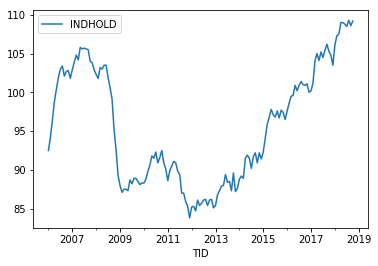

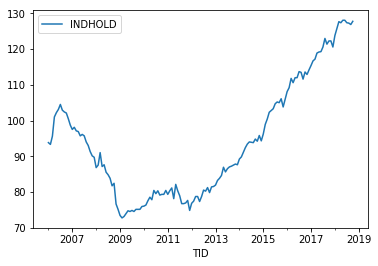

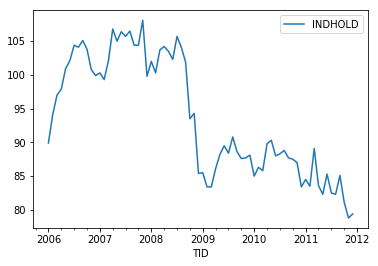

In [12]:
df['TID'] = pd.to_datetime(df['TID'],format='%YM%m')
%matplotlib inline
df.groupby('EJENDOMSKATE').plot(x='TID',y='INDHOLD')

## Adding visualization with Grammar for Graphics

In [13]:
import plotnine as pn

/home/tlj/anaconda3/lib/python3.6/site-packages/plotnine/geoms/geom_path.py:74: UserWarning: geom_path: Removed 82 rows containing missing values.
  warn(msg.format(n1-n2))


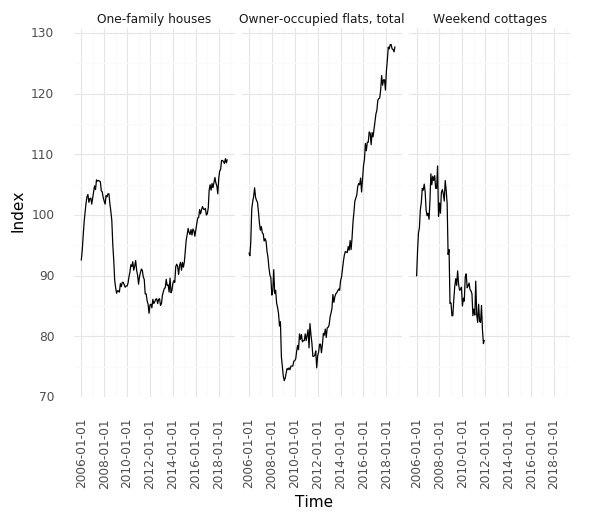

<ggplot: (8782714585043)>

In [17]:
pn.ggplot(df, pn.aes(x='TID', y='INDHOLD'))\
+ pn.geom_line()\
+ pn.facet_wrap('EJENDOMSKATE', ncol=3)\
+ pn.labs(x='Time', y='Index')\
+ pn.theme_minimal()\
+ pn.theme(axis_text_x=pn.element_text(angle=90))

## Mini-assignment
* Go to https://www.dst.dk/ -> find an interesting area
* Goto ->Tabeller i Statistikbanken and copy the table string, e.g. the last part of http://www.statistikbanken.dk/10091
* Get table, meta data, and data
* Preprocess data
* Select data for visualization; select geom; visualize ....

## References
     
Kristian Larsen, PyDST - A python script for accessing the API of Statistics Denmark, [link](https://kristianuruplarsen.github.io/PyDST/)
Danmarks Statistik, Statistikbank API - Beta, [link](https://www.dst.dk/da/Statistik/statistikbanken/api)